In [60]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
geocodes = ['Københavns Kommune', 'Frederiksberg Kommune']
city = ox.geocode_to_gdf(geocodes)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


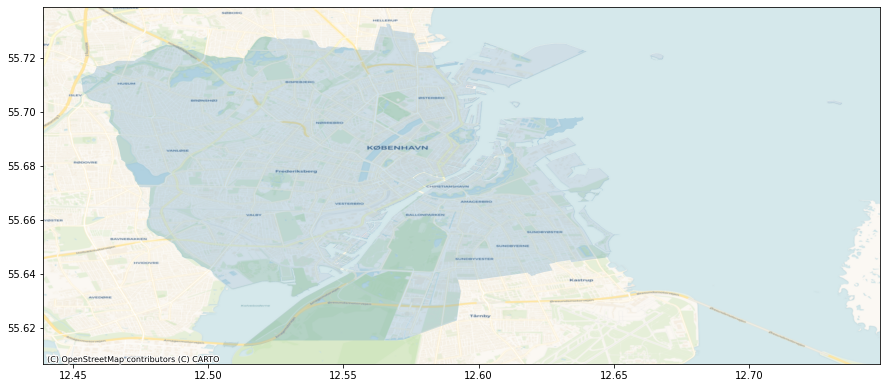

In [53]:
f, ax = plt.subplots(figsize=(15,15))
city.plot(ax=ax, alpha=.2)
cx.add_basemap(ax=ax, crs=city.crs, source=cx.providers.CartoDB.Voyager)

In [57]:
G = ox.graph_from_place(geocodes, network_type='bike')

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


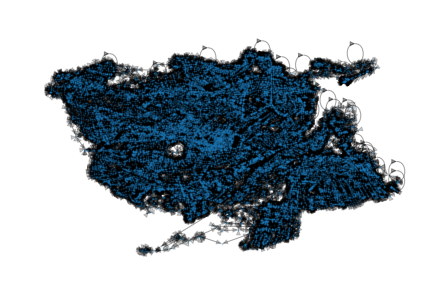

In [104]:
pos = {key: (val['x'], val['y'])for key, val in dict(G.nodes(data=True)).items()}
nx.draw(G, pos=pos, node_size=1, alpha=.2)

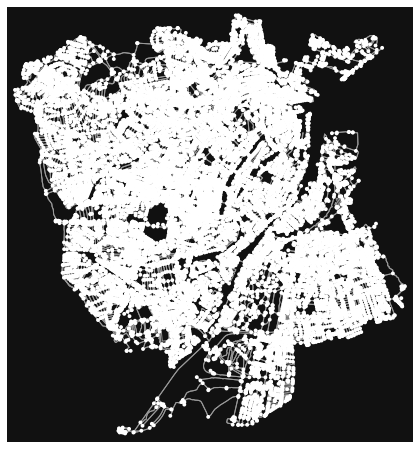

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [59]:
ox.plot_graph(G)